

## Project:TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

The dataset that will be analzyed in these report will be from the movie database TMDB it contains information of about 10,000 movies.The dataset contains various information about a movie i.e id, imdb_id, original_title, budget, popularity, cast, revenue , director , tagline,keywords, runtime,  genres, production_companies, release_year, homepage ,user ratings,revenue.

For basic information about the movie the following columns will be used the original_title, cast and director. For various statistical data about a particular movie columns such as revenue, popularity and budget.

### Question(s) for Analysis 
To carrying out data analysis process the following questions will be used:
   * Which genres are most popular from year to year?
   *  What kind of properties are associated with movies that have a high revenue ?
   
   
Through out these report Python libraries will be used such as Pandas, Numpy and Matplotlib

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

First data will be read from a comma separeted value (csv) then first five rows will be displayed 

In [2]:
#Reading data form the csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Then the dataset will be explored hence knowing various properties of the dataset

In [3]:
# Explore the shape of the dataset
df.shape

(10866, 21)

As per this result there are 10866 rows and 21 columns for this dataset

In [4]:
# Explore the various information of the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset columns contains various datatypes such as int,float and string(objects).There also columns containing missing values and null values that will be cleaned in data cleaning stage


### Data Cleaning

First lets check if there duplicated rows

In [5]:
# Check for duplicated rows
sum(df.duplicated())

1

There is only one lets drop it so that the dataset is uniform 

In [6]:
# Drop duplicated row and check there no duplicated rows 
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Since not all columns are going to be used to carry out the analysis some columns will be dropped

In [7]:
# Drop the irrelevant columns and check the dropping as occured
drop_columns = ['id','imdb_id','original_title','cast','homepage',
                'tagline','overview','release_date','keywords','director','production_companies']

df.drop(drop_columns,axis=1,inplace=True)
df.head(1)

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [12]:
# Explore information for each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
runtime         10865 non-null int64
genres          10842 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
budget_adj      10865 non-null float64
revenue_adj     10865 non-null float64
decades         10833 non-null category
dtypes: category(1), float64(4), int64(5), object(1)
memory usage: 944.5+ KB


As per this information genres contains rows with null values hence dropping of the rows will be done for us to proceed with analysis of the data

In [8]:
# Drop the row containg null value then check that rows with null values have dropped
df.dropna(inplace=True)
sum(df.isnull().sum())

0

Lets review the statisitics of this dataset to know if there any anomilies to sought out

In [14]:
# basic statistics of this data set
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10810.000000,1.081000e+04,1.081000e+04,10810.000000,10810.000000,10810.000000,10810.000000,1.081000e+04,1.081000e+04
mean,0.648019,1.469665e+07,4.001612e+07,102.113228,218.238945,5.973025,2001.437095,1.762414e+07,5.153146e+07
std,1.002040,3.097590e+07,1.172734e+08,31.286093,576.872418,0.934298,12.633551,3.436727e+07,1.448998e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1961.000000,0.000000e+00,0.000000e+00
25%,0.208367,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384846,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715945,1.550000e+07,2.431464e+07,111.000000,146.000000,6.600000,2011.000000,2.098891e+07,3.388314e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As per the data above we see that the minimal budget,revenue and runtime is 0 which is not reasonable in real time hence we will need to clean these inavild data

In [9]:
# clean the invalid data then check its cleaned
min_error = df.query('budget == 0 or runtime == 0 or revenue == 0').index

df.drop(min_error,axis = 0,inplace=True)

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


As per the data above the 0 values have  been cleaned that were in the minimal summary for the various columns

In [10]:
# view basic information for the dataste
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity      3854 non-null float64
budget          3854 non-null int64
revenue         3854 non-null int64
runtime         3854 non-null int64
genres          3854 non-null object
vote_count      3854 non-null int64
vote_average    3854 non-null float64
release_year    3854 non-null int64
budget_adj      3854 non-null float64
revenue_adj     3854 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 331.2+ KB


As per the infomation above cleaning of the dataset is done now we can proceed to Exploratory Analysis 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:Which genres are most popular from year to year?

To answer the question lets get the most popular one each year and relevant columns that will be used to answer these question

In [11]:
df_genres = df[['release_year','genres','popularity']]
df_genres.head()

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014


Then,splitting of the genre column needs to be carried out to make it easier to answer the question hence different rows for the various genre will be formed the code to carry out the code below was sourced from https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe.

In [12]:
# Split the row with more than one row into different rows

from itertools import chain

# creation of a function that returns a list of seperated strings ('|')

def seperate(s):
    return list(chain.from_iterable(s.str.split('|')))

# Get the lengths of the splits
lens = df_genres['genres'].str.split('|').map(len)

# setup a new dataframe,chaining or repeating as appropriate
df_genres = pd.DataFrame({
    'release_year':np.repeat(df_genres['release_year'],lens),
    'genres': seperate(df_genres['genres']),
    'popularity':np.repeat(df_genres['popularity'],lens)
    
})

# Check if the spliting as taken effect
df_genres.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


Since the splitting is done now we need to select the most popular genre for each year.The following source code was sourced from https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group

In [13]:
# A function is defined to carry out the selection

def select(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

# find the mean popularity for each genre in each year
df_pop = df_genres.groupby(['release_year','genres'], as_index=False).mean()

#find the most popular genre for each year
df_most_pop = df_pop.groupby('release_year', as_index=False).apply(select).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1960,Thriller,2.610362
2,1961,Animation,2.631987
3,1962,Thriller,3.170651
4,1963,Adventure,1.586280


A Scatter Plot is drawn to show the change each year for the most popular genre

Text(0,0.5,'Genre')

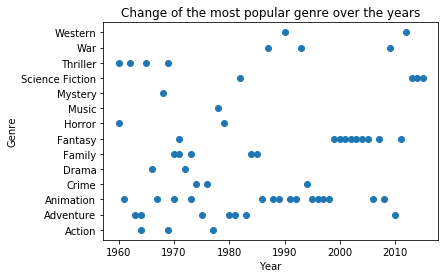

In [14]:
# Drawing A scatter plot for genres
plt.scatter(df_most_pop.release_year,df_most_pop.genres)
plt.title('Change of the most popular genre over the years')
plt.xlabel('Year')
plt.ylabel('Genre')

Using the above scatter plot we can see that across the years there is change in most popular genre. Reading through the plot 1990s the most popular genre was Animation while for 2000s Fantasy was the most popular

To get a clear understanding of the most popular genre we plot a pie chart.

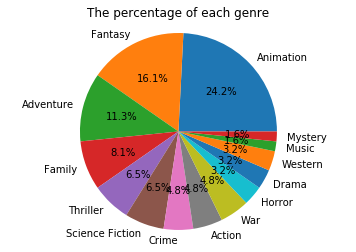

In [15]:
# Drawing a pie chart for genres

sizes = df_most_pop.genres.value_counts().values
labels = df_most_pop.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('The percentage of each genre')

plt.show()

As per the pie chart above using the various percentages Fantasy and Animation genres are the most popular across the years while the least popular are music and mystery

### Research Question 2: What kind of properties are associated with movies that have a high revenue ?

Inorder to answer these question ,high revenue will be defined.First lets discover the revenue properties

In [24]:
# Revenue properties 
df.revenue.describe()

count    3.849000e+03
mean     1.077930e+08
std      1.766278e+08
min      2.000000e+00
25%      1.360940e+07
50%      4.486219e+07
75%      1.243052e+08
max      2.781506e+09
Name: revenue, dtype: float64

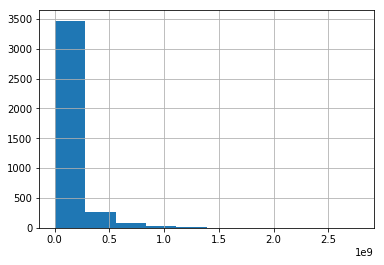

In [57]:
# Drawing an histogram for Revenue
df.revenue.hist();

Lets draw  a graph trend line showing the distribution  of revenue across the years and change in revenue

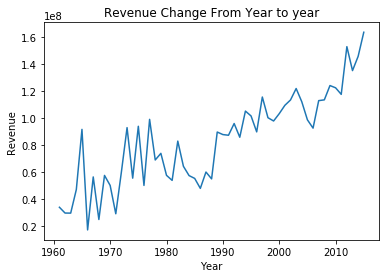

In [25]:
# Draw a grapth trend line for change in revenue
revenues= df.groupby('release_year')['revenue'].mean()

plt.plot(revenues)
plt.title('Revenue Change From Year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

From the graph, revenue changed drastically as from the 1960s showing an upward trend. Since the years are many the years will be aggregated to decades to make it easier to analyze the data 

In [16]:
# Aggregation of years to decades

years = [1960,1970,1980,1990,2000,2010,2015]
d_years =['1960s','1970s','1980','1990s','2000s','2010s']
df['decades'] = pd.cut(df['release_year'], years, labels= d_years)

df.head()


,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,2010s
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,2010s
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,2010s


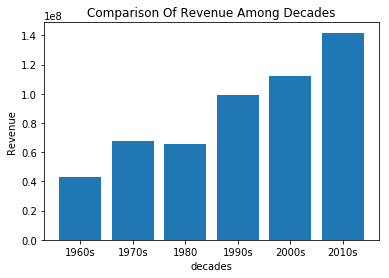

In [34]:
# Drawing a bar chart to compare revenues for differnat decades for the dataset

revenue_decade = df.groupby('decades').revenue.mean()

plt.bar(revenue_decade.index, revenue_decade.values)
plt.title('Comparison Of Revenue Among Decades')
plt.xlabel('decades')
plt.ylabel('Revenue')

plt.show()

As per the bar grapth above 1960s accounts for the lowest revenue generated by a movie while 2010S accounts for the highest revenue generated by a movie

Now lets get to know the hightest revenue for the dataset for these the pattern for the group of high revenue above the 75% percentile will be used 

In [19]:
# Extract the high revenue from the dataset
high_revenue = df.revenue.quantile(.75)
high_revenue_df = df[df.revenue > high_revenue]
high_revenue_df.revenue.describe()

count    9.640000e+02
mean     3.197611e+08
std      2.473609e+08
min      1.242721e+08
25%      1.653347e+08
50%      2.321503e+08
75%      3.682613e+08
max      2.781506e+09
Name: revenue, dtype: float64

Lets carry out the correlation between various variables, three variables will be used to vote_average, popularity,budget all in comparison with Revenue.A scatter plot together with correlation calculation they will be used to carry out analysis for correlation.

Lets start with finding out the correlation of popularity and revenue by drawing a scatterplot then calculating correlation

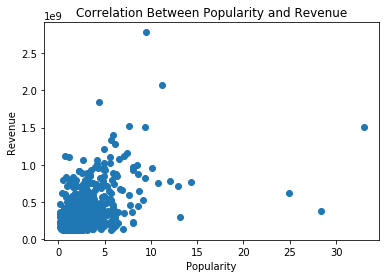

In [22]:
# Drawing a Scatterplot of revenue and popularity
plt.scatter(x=high_revenue_df.popularity, y=high_revenue_df.revenue)
plt.title('Correlation Between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()

Now lets calculate the correlation between popularity and revenue

In [23]:
# Calcalute the correlation between popularity and revenue
high_revenue_df[['popularity','revenue']].corr()

,popularity,revenue
popularity,1.000000,0.511673
revenue,0.511673,1.000000


As per the data above the correlation between revenue and popularity and vice verse is 0.51 which is relatively a high correlation

Now Lets carry out the correlation between revenue and vote_average by drawing a scatterplot then calculating correlation

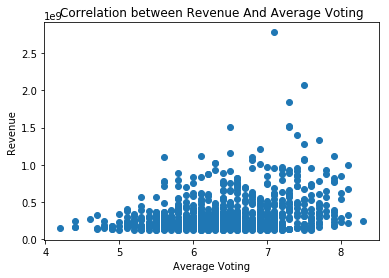

In [27]:
# Drawing a scatterplot of revenue and vote_average
plt.scatter(x=high_revenue_df.vote_average, y=high_revenue_df.revenue)
plt.title('Correlation between Revenue And Average Voting')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

Now lets calculate the correlation between Average Voting and Revenue

In [28]:
high_revenue_df[['vote_average','revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.297338
revenue,0.297338,1.000000


As per the data above the correlation between vote_average and revenue and vice verse is 0.3 which is a reletively low correlation

Now lets carry out the correlation between budget and revenue by drawing a scatter plot then calculating correlation

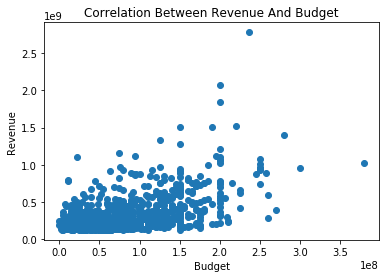

In [30]:
# Drawing a scatterplot of revenue and budget
plt.scatter(x=high_revenue_df.budget,y=high_revenue_df.revenue)
plt.title('Correlation Between Revenue And Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

Now lets calculate the correlation between budget and revenue

In [32]:
high_revenue_df[['budget','revenue']].corr()

,budget,revenue
budget,1.00000,0.55703
revenue,0.55703,1.00000


As per the data above the correlation between budget and revenue and vise verse is 0.55 which is a relatively high correlation

The conclusion is that high_revenue is associated with budget and popularity highly as compared to vote_average 

<a id='conclusions'></a>
## Conclusions

After carrying out the data analysis processes these are some of the conclusion drawn:

* The genre that are the most popular through out the years are Fantasy,Animation and Adveneture account for the largest portion while Mystery and Music account for the least portion.
* The revenue shows a postive increment drastically each year hence 1960 accounts for the least revenue generated while 2010 account for the highest revenue generated.
* The highest revenue is observered to have a postive correlation with budget and popularity while a weak correlation with vote_average

The limitations in these dataset varies from having irrelavant data columns that are not needed in the analysis, having data that is outdated it would have been better if the data we had was up to date due to the current state of the world where we have streaming services.

<a id='references'></a>
## References
1. https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
2. https://pandas.pydata.org/pandas-docs/stable/
3. https://numpy.org/doc/stable/index.html
4. https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
5. https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe.#comment98688697_50731258
6. https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255